In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, kstest, shapiro, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
rnd_rnd_df =  pd.read_csv('/content/metrics_results_rndWords.csv')

In [ ]:
rnd_rnd_df = rnd_rnd_df.dropna(axis=1, how='all')

In [ ]:
df = rnd_rnd_df[['FILE_NAME', 'STATES', 'INPUTS', 'LSTAR_rndWords_MQ_SYM',
       'LSTAR_rndWords_MQ_RST', 'LSTAR_rndWords_EQ_SYM',
       'LSTAR_rndWords_EQ_RST', 'LSTAR_rndWords_TOTAL_SYM',
       'LSTAR_rndWords_TOTAL_RST', 'LSTAR_rndWords_EQs',
       'LIP_rndWords_rndWords_MQ_SYM', 'LIP_rndWords_rndWords_MQ_RST',
       'LIP_rndWords_rndWords_EQ_SYM', 'LIP_rndWords_rndWords_EQ_RST',
       'LIP_rndWords_rndWords_TOTAL_SYM', 'LIP_rndWords_rndWords_TOTAL_RST',
       'LIP_rndWords_rndWords_EQs', 'LIP_rndWords_rndWords_COMPONENTS',
       'LIP_rndWords_rndWords_ROUNDS']]

## Clean data

In [ ]:
def round_data(data):
  return round(data, 3)

In [ ]:
def rename_file_name(fileName):
  if ".dot" in fileName:
    return fileName
  return fileName[fileName.rfind('/',0, fileName.rfind('/') - 1)+1:]
  # return string.find(substring, string.find(substring) + 1)

In [ ]:
df = df[(df["STATES"]<=3840) & (df["STATES"]>300) ]

In [ ]:
df['FILE_NAME'] = df['FILE_NAME'].apply(rename_file_name)

In [ ]:
# df = df.iloc[: , :-1]
df = df.dropna(axis=1, how='all')
# Drop last column of a dataframe
df = df.dropna()

In [ ]:
# Calculate mean without outliers
from scipy import stats
def trimmed_mean(x):
  z = stats.zscore(x)
  d_z = x.loc[z<3,]
  return d_z.mean()

## Data Process

In [ ]:
print("Count:  ",df['FILE_NAME'].unique().size)
print("Min:    ",df.groupby('FILE_NAME').agg(min)['STATES'].min())
print("Max:    ",df.groupby('FILE_NAME').agg(min)['STATES'].max())

print("mean:   ", df.groupby('FILE_NAME').agg(min)['STATES'].mean())

print("std:    ", df.groupby('FILE_NAME').agg(min)['STATES'].std())

Count:   100
Min:     312
Max:     3840
mean:    1278.28
std:     847.0670501647126


In [ ]:
df['LIP_rndWords_rndWords_TOTAL_RST_progress'] = (1 - (df['LIP_rndWords_rndWords_TOTAL_RST'] / df['LSTAR_rndWords_TOTAL_RST']))*100

df['LIP_rndWords_rndWords_MQ_SYM_progress'] = (1 - (df['LIP_rndWords_rndWords_MQ_SYM'] / df['LSTAR_rndWords_MQ_SYM']))*100

df['LIP_rndWords_rndWords_MQ_RST_progress'] = (1 - (df['LIP_rndWords_rndWords_MQ_RST'] / df['LSTAR_rndWords_MQ_RST']))*100

df['LIP_rndWords_rndWords_EQ_SYM_progress'] = (1 - (df['LIP_rndWords_rndWords_EQ_SYM'] / df['LSTAR_rndWords_EQ_SYM']))*100

df['LIP_rndWords_rndWords_EQ_RST_progress'] = (1 - (df['LIP_rndWords_rndWords_EQ_RST'] / df['LSTAR_rndWords_EQ_RST']))*100

df['LIP_rndWords_rndWords_TOTAL_SYM_progress'] = (1 - (df['LIP_rndWords_rndWords_TOTAL_SYM'] / df['LSTAR_rndWords_TOTAL_SYM']))*100


In [ ]:
# @title Bins
bins = [300,600,900,1200,1500,1800,2100,2400, 3840]
labels = []

In [ ]:
# Check for normal
for i in range(0, len(bins)-1):
    data = df[df['STATES']>bins[i] & (df['STATES']<=bins[i+1])]
    states_count = data.loc[:,'STATES']
    input_count = data.loc[:,'INPUTS']
    # print(len(data))
    lstar_resets_count = data.loc[:,'LIP_rndWords_rndWords_TOTAL_RST']
    lip_resets_count = data.loc[:,'LIP_rndWords_rndWords_TOTAL_RST']
    lstar_symbols_count = data.loc[:,'LIP_rndWords_rndWords_TOTAL_SYM']
    lip_symbols_count = data.loc[:,'LIP_rndWords_rndWords_TOTAL_SYM']
    print(bins[i],  '-', bins[i+1])
    print(kstest(states_count,'norm'))
    # print(kstest(input_count,'norm'))
    print(kstest(lstar_resets_count,'norm'))
    print(kstest(lip_resets_count,'norm'))
    print(kstest(lstar_symbols_count,'norm'))
    print(kstest(lip_symbols_count,'norm'))

    print(shapiro(states_count))
    # print(shapiro(input_count))
    print(shapiro(lstar_resets_count))
    print(shapiro(lip_resets_count))
    print(shapiro(lstar_symbols_count))
    print(shapiro(lip_symbols_count))




300 - 600
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
ShapiroResult(statistic=0.8966040015220642, pvalue=2.638812020457071e-13)
ShapiroResult(statistic=0.37110936641693115, pvalue=1.143679173039316e-30)
ShapiroResult(statistic=0.37110936641693115, pvalue=1.143679173039316e-30)
ShapiroResult(statistic=0.4654356837272644, pvalue=8.648638786163653e-29)
ShapiroResult(statistic=0.4654356837272644, pvalue=8.648638786163653e-29)
600 - 900
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
ShapiroResult(statistic=0.8966040015220642, pvalue=2.638812020457071e-13)
ShapiroResult(statistic=0.37110936641693115, pvalue=1.143679173039316e-30)
ShapiroResult(statistic=0.37110936641693115, pvalue=1.14367

In [ ]:
grouped = df.groupby(pd.cut(df["STATES"],bins))
df3 = grouped.agg(
    # states = pd.NamedAgg(column='STATES', aggfunc="min"),
    inputs=pd.NamedAgg(column="INPUTS", aggfunc='median'),

    LSTAR_rndWords_total_sym_median=pd.NamedAgg(column='LSTAR_rndWords_TOTAL_SYM', aggfunc='median'),
    LSTAR_rndWords_total_sym_mean=pd.NamedAgg(column='LSTAR_rndWords_TOTAL_SYM', aggfunc='mean'),
    LSTAR_rndWords_total_sym_std=pd.NamedAgg(column='LSTAR_rndWords_TOTAL_SYM', aggfunc="std"),
    LSTAR_rndWords_total_reset_median=pd.NamedAgg(column='LSTAR_rndWords_TOTAL_RST', aggfunc='median'),
    LSTAR_rndWords_total_reset_mean=pd.NamedAgg(column='LSTAR_rndWords_TOTAL_RST', aggfunc='mean'),
    LSTAR_rndWords_total_reset_std=pd.NamedAgg(column='LSTAR_rndWords_TOTAL_RST', aggfunc="std"),
    LSTAR_rndWords_mq_sym_mean=pd.NamedAgg(column='LSTAR_rndWords_MQ_SYM', aggfunc='median'),
    LSTAR_rndWords_mq_sym_std=pd.NamedAgg(column='LSTAR_rndWords_MQ_SYM', aggfunc="std"),
    LSTAR_rndWords_mq_reset_mean=pd.NamedAgg(column='LSTAR_rndWords_MQ_RST', aggfunc='median'),
    LSTAR_rndWords_mq_reset_std=pd.NamedAgg(column='LSTAR_rndWords_MQ_RST', aggfunc="std"),
    LSTAR_rndWords_eq_sym_mean=pd.NamedAgg(column='LSTAR_rndWords_EQ_SYM', aggfunc='median'),
    LSTAR_rndWords_eq_sym_std=pd.NamedAgg(column='LSTAR_rndWords_EQ_SYM', aggfunc="std"),
    LSTAR_rndWords_eq_reset_mean=pd.NamedAgg(column='LSTAR_rndWords_EQ_RST', aggfunc='median'),
    LSTAR_rndWords_eq_reset_std=pd.NamedAgg(column='LSTAR_rndWords_EQ_RST', aggfunc="std"),
    LSTAR_rndWords_eqs=pd.NamedAgg(column='LSTAR_rndWords_EQs', aggfunc='median'),

    LIP_rndWords_rndWords_total_sym_median=pd.NamedAgg(column='LIP_rndWords_rndWords_TOTAL_SYM', aggfunc='mean'),
    LIP_rndWords_rndWords_total_sym_mean=pd.NamedAgg(column='LIP_rndWords_rndWords_TOTAL_SYM', aggfunc='median'),
    LIP_rndWords_rndWords_total_sym_std=pd.NamedAgg(column='LIP_rndWords_rndWords_TOTAL_SYM', aggfunc="std"),
    LIP_rndWords_rndWords_total_reset_median=pd.NamedAgg(column='LIP_rndWords_rndWords_TOTAL_RST', aggfunc='median'),
    LIP_rndWords_rndWords_total_reset_mean=pd.NamedAgg(column='LIP_rndWords_rndWords_TOTAL_RST', aggfunc='mean'),
    LIP_rndWords_rndWords_total_reset_std=pd.NamedAgg(column='LIP_rndWords_rndWords_TOTAL_RST', aggfunc="std"),
    LIP_rndWords_rndWords_mq_sym_mean=pd.NamedAgg(column='LIP_rndWords_rndWords_MQ_SYM', aggfunc='median'),
    LIP_rndWords_rndWords_mq_sym_std=pd.NamedAgg(column='LIP_rndWords_rndWords_MQ_SYM', aggfunc="std"),
    LIP_rndWords_rndWords_mq_reset_mean=pd.NamedAgg(column='LIP_rndWords_rndWords_MQ_RST', aggfunc='median'),
    LIP_rndWords_rndWords_mq_reset_std=pd.NamedAgg(column='LIP_rndWords_rndWords_MQ_RST', aggfunc="std"),
    LIP_rndWords_rndWords_eq_sym_mean=pd.NamedAgg(column='LIP_rndWords_rndWords_EQ_SYM', aggfunc='median'),
    LIP_rndWords_rndWords_eq_sym_std=pd.NamedAgg(column='LIP_rndWords_rndWords_EQ_SYM', aggfunc="std"),
    LIP_rndWords_rndWords_eq_reset_mean=pd.NamedAgg(column='LIP_rndWords_rndWords_EQ_RST', aggfunc='median'),
    LIP_rndWords_rndWords_eq_reset_std=pd.NamedAgg(column='LIP_rndWords_rndWords_EQ_RST', aggfunc="std"),
    LIP_rndWords_rndWords_eqs=pd.NamedAgg(column='LIP_rndWords_rndWords_EQs', aggfunc='median'),
    LIP_rndWords_rndWords_components=pd.NamedAgg(column='LIP_rndWords_rndWords_COMPONENTS', aggfunc='median'),
    LIP_rndWords_rndWords_rounds=pd.NamedAgg(column='LIP_rndWords_rndWords_ROUNDS', aggfunc='median'),

).reset_index()


In [ ]:
# Progress
df3['LIP_rndWords_rndWords_TOTAL_SYM_progress'] = (1 - (df3['LIP_rndWords_rndWords_total_sym_mean'] / df3['LSTAR_rndWords_total_sym_mean']))*100
df3['LIP_rndWords_rndWords_TOTAL_RST_progress'] = (1 - (df3['LIP_rndWords_rndWords_total_reset_mean'] / df3['LSTAR_rndWords_total_reset_mean']))*100
df3['LIP_rndWords_rndWords_MQ_SYM_progress'] = (1 - (df3['LIP_rndWords_rndWords_mq_sym_mean'] / df3['LSTAR_rndWords_mq_sym_mean']))*100
df3['LIP_rndWords_rndWords_MQ_RST_progress'] = (1 - (df3['LIP_rndWords_rndWords_mq_reset_mean'] / df3['LSTAR_rndWords_mq_reset_mean']))*100
df3['LIP_rndWords_rndWords_EQ_SYM_progress'] = (1 - (df3['LIP_rndWords_rndWords_eq_sym_mean'] / df3['LSTAR_rndWords_eq_sym_mean']))*100
df3['LIP_rndWords_rndWords_EQ_RST_progress'] = (1 - (df3['LIP_rndWords_rndWords_eq_reset_mean'] / df3['LSTAR_rndWords_eq_reset_mean']))*100


In [ ]:
# @title Pvalue 
pvalue_info = {'STATES':[],
'LIP_rndWords_rndWords_TOTAL_SYM_pvalue':[],
'LIP_rndWords_rndWords_TOTAL_RST_pvalue':[],
              }
for index, row in df3.iterrows():
  data_range = row['STATES']
  filtered_df = df[(df['STATES']<data_range.right) & (df['STATES']>=data_range.left)]
  mq_sym_ttest = ttest_rel(filtered_df.loc[:,'LIP_rndWords_rndWords_TOTAL_SYM'], filtered_df.loc[:,'LSTAR_rndWords_TOTAL_SYM'], alternative='less').pvalue
  eq_reset_ttest = ttest_rel(filtered_df.loc[:,'LIP_rndWords_rndWords_TOTAL_RST'], filtered_df.loc[:,'LSTAR_rndWords_TOTAL_RST'], alternative='less').pvalue

  pvalue_info['STATES'].append(data_range)
  pvalue_info['LIP_rndWords_rndWords_TOTAL_SYM_pvalue'].append(mq_sym_ttest)
  pvalue_info['LIP_rndWords_rndWords_TOTAL_RST_pvalue'].append(eq_reset_ttest)

pvalue_df = pd.DataFrame(pvalue_info)
final_df = pd.merge(df3, pvalue_df,how='right', on='STATES')



In [ ]:
final_df['LIP_rndWords_rndWords_TOTAL_SYM_pvalue']

0    1.137926e-03
1    7.807212e-06
2    3.198057e-10
3    3.798442e-05
4    8.060798e-07
5    7.313082e-03
6    1.528376e-07
7    1.837441e-09
Name: LIP_rndWords_rndWords_TOTAL_SYM_pvalue, dtype: float64

In [ ]:
final_df.to_csv("rnd_rnd_pvalue.csv")

# Plots

In [ ]:
sns.set(rc={'figure.figsize':(15,6)})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


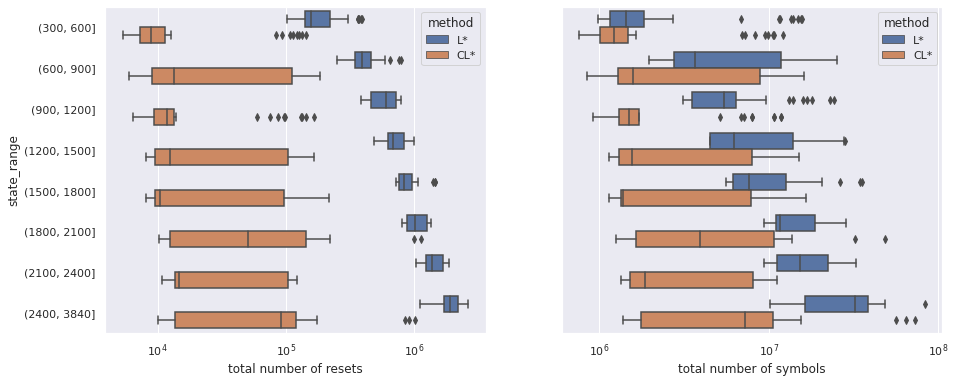

In [ ]:
fig, axs = plt.subplots(ncols=2)

d2 = df[['STATES', 'LSTAR_rndWords_TOTAL_RST', 'LIP_rndWords_rndWords_TOTAL_RST']]
d2['state_range'] = pd.cut(d2['STATES'], bins= bins)
d2 = d2.set_index('state_range')

d2[['L*',  'CL*']] = d2[['LSTAR_rndWords_TOTAL_RST',  'LIP_rndWords_rndWords_TOTAL_RST']] 

d2 = d2[['L*',  'CL*']].stack().reset_index()
d2 = d2.rename(columns={"level_1": "method", 0: "total number of resets"})

g1 = sns.boxplot(y = d2['state_range'],
			x = d2['total number of resets'],
			hue = d2['method'],
       showcaps=True,orient="h", ax=axs[0]).set_xscale('log')


d1 = df[['STATES', 'LSTAR_rndWords_TOTAL_SYM', 'LIP_rndWords_rndWords_TOTAL_SYM']]
d1['state_range'] = pd.cut(d1['STATES'], bins= bins)
d1 = d1.set_index('state_range')
d1[['L*',  'CL*']] = d1[['LSTAR_rndWords_TOTAL_SYM',  'LIP_rndWords_rndWords_TOTAL_SYM']] 
d1 = d1[['L*',  'CL*']].stack().reset_index()
d1 = d1.rename(columns={"level_1": "method", 0: "total number of symbols"})

g2 = sns.boxplot(y = d1['state_range'],
			x = d1['total number of symbols'],
			hue = d1['method'],
       showcaps=True,orient="h", ax=axs[1])
g2.set_xscale('log')

g2.set(yticklabels=[])
g2.set(ylabel=None)
g2.tick_params(bottom=False) 
# plt.grid()
# plt.show()


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


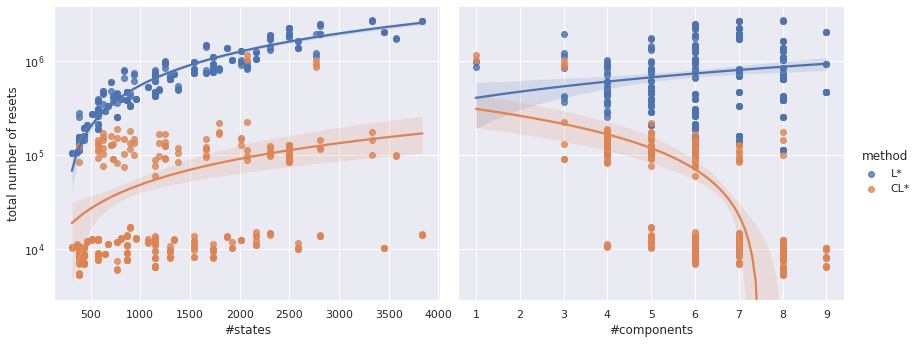

In [ ]:


d2 = df[['STATES','LIP_rndWords_rndWords_COMPONENTS', 'LSTAR_rndWords_TOTAL_RST', 'LIP_rndWords_rndWords_TOTAL_RST']]

d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_rndWords_TOTAL_RST',  'LIP_rndWords_rndWords_TOTAL_RST', 'LIP_rndWords_rndWords_COMPONENTS', 'STATES']] 
d2 = d2.set_index(['#states','#components'])

d2 = d2[['L*',  'CL*']].stack().reset_index()
d2 = d2.rename(columns={"level_2": "method", 0: "total number of resets"})

sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of resets"],
             hue="method", height=5, aspect=1.2, kind="reg" );
plt.yscale('log')


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


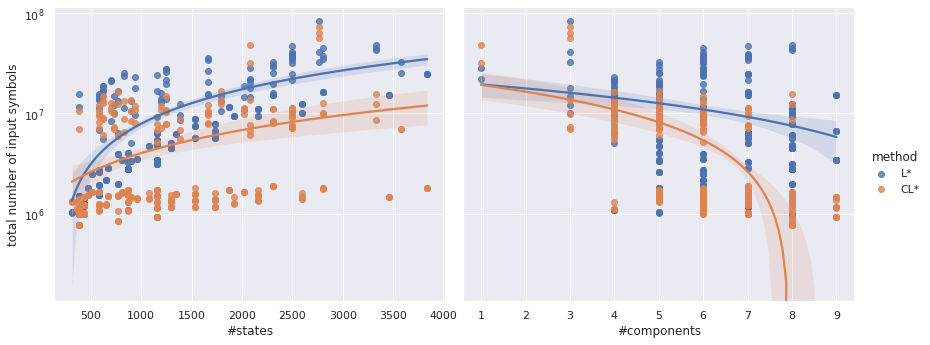

In [ ]:

d2 = df[['STATES','LIP_rndWords_rndWords_COMPONENTS', 'LSTAR_rndWords_TOTAL_SYM', 'LIP_rndWords_rndWords_TOTAL_SYM']]

d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_rndWords_TOTAL_SYM',  'LIP_rndWords_rndWords_TOTAL_SYM', 'LIP_rndWords_rndWords_COMPONENTS', 'STATES']] 
d2 = d2.set_index(['#states','#components'])

d2 = d2[['L*',  'CL*']].stack().reset_index()
d2 = d2.rename(columns={"level_2": "method", 0: "total number of input symbols"})

sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of input symbols"],
             hue="method", height=5, aspect=1.2, kind="reg" );
plt.yscale('log')


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


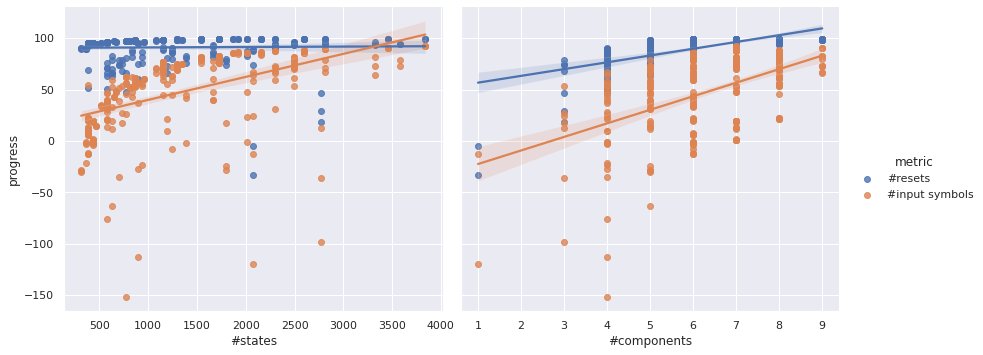

In [ ]:
df = df[df["STATES"]<=3840]
# df = df[df["LIP_rndWords_rndWords_TOTAL_RST_progress"]>=-500]
d2 = df[['STATES','LIP_rndWords_rndWords_COMPONENTS', 'LIP_rndWords_rndWords_TOTAL_RST_progress', 'LIP_rndWords_rndWords_TOTAL_SYM_progress']]
# d2['state_range'] = pd.cut(d2['STATES'], bins= bins)

d2[['#resets',  '#input symbols', '#components', '#states']] = d2[['LIP_rndWords_rndWords_TOTAL_RST_progress',  'LIP_rndWords_rndWords_TOTAL_SYM_progress', 'LIP_rndWords_rndWords_COMPONENTS', 'STATES']] 
d2 = d2.set_index(['#states','#components'])

d2 = d2[['#resets',  '#input symbols']].stack().reset_index()
d2 = d2.rename(columns={"level_2": "metric", 0: "progress"})
# fig, ax = plt.subplots()
# sns.boxplot(x = d2['components'],
# 			y = d2['total number of resets'],
# 			hue = d2['method'], ax=ax,
#        showcaps=True).set_yscale('log')
# sns.lmplot(x= 'components',
# 			y = 'total number of resets',
# 			data=d2, scatter=False, hue='method', ax=ax).set_yscale('log')
# sns.jointplot(x="components", y="total number of resets", hue="method", data=d2, kind="reg");
sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["progress"],
             hue="metric", height=5, aspect=1.2, kind="reg" );
# plt.yscale('log')


In [ ]:
df[(df["STATES"]>1800) & (df["STATES"]<2100)]

,FILE_NAME,STATES,INPUTS,LSTAR_rndWords_MQ_SYM,LSTAR_rndWords_MQ_RST,LSTAR_rndWords_EQ_SYM,LSTAR_rndWords_EQ_RST,LSTAR_rndWords_TOTAL_SYM,LSTAR_rndWords_TOTAL_RST,LSTAR_rndWords_EQs,...,LIP_rndWords_rndWords_TOTAL_RST,LIP_rndWords_rndWords_EQs,LIP_rndWords_rndWords_COMPONENTS,LIP_rndWords_rndWords_ROUNDS,LIP_rndWords_rndWords_TOTAL_RST_progress,LIP_rndWords_rndWords_MQ_SYM_progress,LIP_rndWords_rndWords_MQ_RST_progress,LIP_rndWords_rndWords_EQ_SYM_progress,LIP_rndWords_rndWords_EQ_RST_progress,LIP_rndWords_rndWords_TOTAL_SYM_progress
13,products/8wise_11.txt,2016,25,10770025,1260025,301498,2000,11071523,1262025,1,...,12412,59,8,18,99.016501,99.550902,99.861352,-431.273176,-433.250000,85.095583
80,products/8wise_11.txt,2016,25,10770025,1260025,300403,2000,11070428,1262025,1,...,12427,59,8,18,99.015313,99.554839,99.858574,-433.154795,-432.250000,85.099429
180,products/6wise_9.txt,2076,17,21661535,853978,371991,2484,22033526,856462,4,...,1143582,66,1,17,-33.523963,-114.561941,-32.502945,-387.038396,-384.541063,-119.162149
216,products/8wise_11.txt,2016,25,10770025,1260025,299061,2000,11069086,1262025,1,...,12329,59,8,18,99.023078,99.699954,99.866431,-436.119053,-432.300000,85.223369
217,products/6wise_9.txt,2076,17,17847863,832747,316016,2092,18163879,834839,4,...,219732,52,3,15,73.679715,30.808736,74.736985,-344.948357,-347.179732,24.271297
222,products/6wise_9.txt,2076,17,27878661,953474,553590,3678,28432251,957152,5,...,1001578,61,1,17,-4.641478,-9.498480,-3.929525,-188.474322,-189.206090,-12.983228
261,products2/9wise_6.txt,1920,23,9039575,1015703,298899,2000,9338474,1017703,1,...,11686,53,8,16,98.851728,99.717719,99.796397,-385.354919,-380.900000,84.191871
342,products2/9wise_6.txt,1920,23,9039575,1015703,298732,2000,9338307,1017703,1,...,10272,53,8,16,98.990668,99.486624,99.790687,-311.376752,-307.300000,86.343124
395,products2/9wise_6.txt,1920,23,9039575,1015703,297909,2000,9337484,1017703,1,...,10182,53,8,16,98.999512,99.643291,99.798760,-310.727101,-306.900000,86.550574
419,products2/6wise_41.txt,1872,27,11372427,1364715,300964,2000,11673391,1366715,1,...,13494,69,6,22,99.012669,99.786651,99.828755,-456.474196,-457.850000,85.445103
